In [1]:
import pydpmd as dp
from pydpmd.plot import draw_particles_frame
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pydpmd.data import load
import numpy as np
from numba import njit
from scipy.spatial import cKDTree
from pydpmd.calc import run_binned, run_binned_ragged, fused_msd_kernel, TimeBins, LagBinsExact, LagBinsLog, LagBinsLinear, LagBinsPseudoLog, requires_fields
from corr import *

In [2]:
path = '/Users/marshallmccraw/Projects/yale/data/s-25/10-02-25/grace-data/rb-compression-diffusion-lower-temp/mu_eff-1.00/correlation_20'

data = dp.data.load(path, location=['final', 'init'], load_trajectory=True, load_full=False)

In [166]:
rmax = 3
n_bins = 1000
r_bins = np.linspace(0.5, rmax, n_bins)
g, r = compute_pair_correlation_function(data, r_bins)


unique_radii = np.unique(data.rad)
radii = data.rad

n_workers = 10

n_systems = data.n_systems()

bins = LagBinsPseudoLog.from_source(data.trajectory)
t = bins.values()

for i, target_rad in enumerate(unique_radii):
    break

for sid in np.unique(data.system_id):
    break

sid = 0

first_shell_factor = 1.0
n_bins_first_shell = 10

r_bins_first_shell = np.linspace(r_bins[np.argwhere(g[sid, i] > 0)[0][0]] * 0.999, r_bins[np.argmax(g[sid, i])] * first_shell_factor, n_bins_first_shell)
neighbor_list_by_frame, neighbor_offset_by_frame, bin_ids_by_frame = compute_neighbor_list_for_all_frames(data, np.max(r_bins_first_shell), r_bins_first_shell, target_rad=target_rad, sid=sid, n_workers=n_workers)

Binned accumulation:   0%|          | 0/1000 [00:00<?, ?it/s]

Ragged binned collection: 100%|██████████| 1000/1000 [00:00<00:00, 1325.89it/s]


In [167]:
data.packing_fraction

array([0.67933203, 0.74153473, 0.77666601, 0.81376897, 0.82799241])

In [168]:
res_1 = run_binned(angle_disp_kernel_1, data.trajectory, bins, kernel_kwargs={'neighbor_list_by_frame': neighbor_list_by_frame, 'bin_ids_by_frame': bin_ids_by_frame, 'n_bins': n_bins_first_shell, 'n_systems': n_systems}, show_progress=True, n_workers=n_workers)
res_denom_1 = run_binned(angle_disp_kernel_1_denom, data.trajectory, bins, kernel_kwargs={'system_size': data.system_size, 'system_offset': data.system_offset}, show_progress=True, n_workers=n_workers)

Binned accumulation: 100%|██████████| 22005/22005 [00:00<00:00, 26006.39it/s]


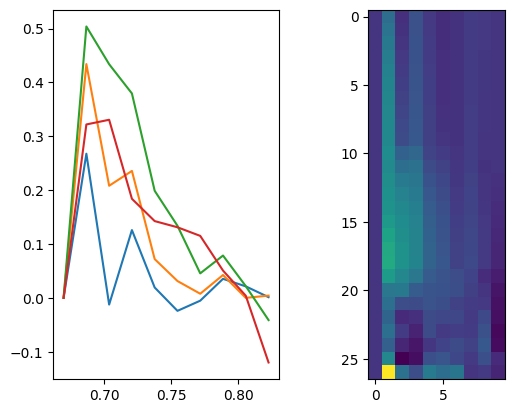

In [169]:
rs1 = res_1.mean.copy()
rd1 = res_denom_1.mean.copy()

S1 = rs1[:, 0, sid]
nzm = rs1[:, 1, sid] != 0
S1[nzm] /= rs1[:, 1, sid][nzm]
S1 /= rd1[:, sid][:, None]

fig, ax = plt.subplots(1, 2)
ax[0].plot(r_bins_first_shell, S1[0])
ax[0].plot(r_bins_first_shell, S1[10])
ax[0].plot(r_bins_first_shell, S1[15])
ax[0].plot(r_bins_first_shell, S1[20])
ax[1].imshow(S1)

In [170]:
res_2 = run_binned(angle_disp_kernel_2, data.trajectory, bins, kernel_kwargs={'neighbor_list_by_frame': neighbor_list_by_frame, 'bin_ids_by_frame': bin_ids_by_frame, 'n_bins': n_bins_first_shell, 'n_systems': n_systems}, show_progress=True, n_workers=n_workers)
res_denom_2 = run_binned(angle_disp_kernel_2_denom, data.trajectory, bins, kernel_kwargs={'system_size': data.system_size, 'system_offset': data.system_offset}, show_progress=True, n_workers=n_workers)

Binned accumulation: 100%|██████████| 22005/22005 [00:00<00:00, 29047.16it/s]


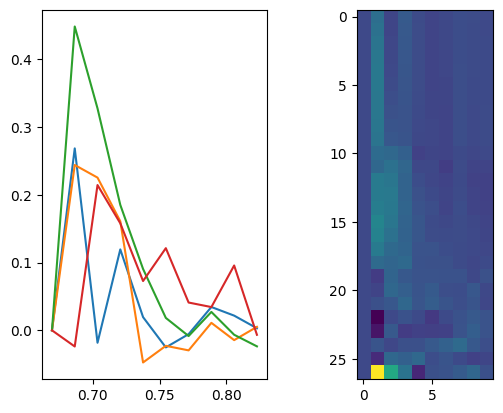

In [171]:
rs2 = res_2.mean.copy()
rd2 = res_denom_2.mean.copy()

S2 = rs2[:, 0, sid]
nzm = rs2[:, 1, sid] != 0
S2[nzm] /= rs2[:, 1, sid][nzm]
S2 /= rd2[:, sid][:, None]

fig, ax = plt.subplots(1, 2)
ax[0].plot(r_bins_first_shell, S2[0])
ax[0].plot(r_bins_first_shell, S2[10])
ax[0].plot(r_bins_first_shell, S2[15])
ax[0].plot(r_bins_first_shell, S2[20])
ax[1].imshow(S2)

In [172]:
res_3 = run_binned(angle_disp_kernel_3, data.trajectory, bins, kernel_kwargs={'neighbor_list_by_frame': neighbor_list_by_frame, 'bin_ids_by_frame': bin_ids_by_frame, 'n_bins': n_bins_first_shell, 'n_systems': n_systems}, show_progress=True, n_workers=n_workers)
res_denom_3 = run_binned(angle_disp_kernel_3_denom, data.trajectory, bins, kernel_kwargs={'system_size': data.system_size, 'system_offset': data.system_offset}, show_progress=True, n_workers=n_workers)

Binned accumulation: 100%|██████████| 22005/22005 [00:00<00:00, 28041.13it/s]


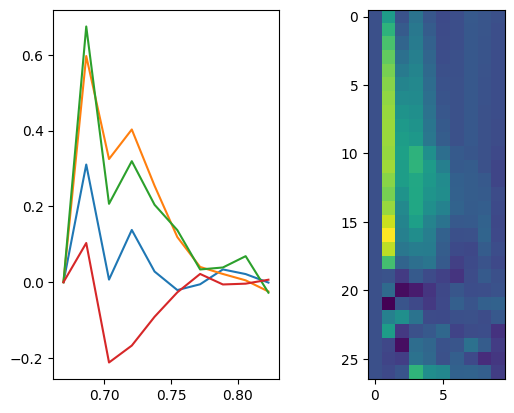

In [175]:
rs3 = res_3.mean.copy()
rd3 = res_denom_3.mean.copy()

S3 = rs3[:, 0, sid]
nzm = rs3[:, 1, sid] != 0
S3[nzm] /= rs3[:, 1, sid][nzm]
S3 /= rd3[:, sid][:, None]

fig, ax = plt.subplots(1, 2)
ax[0].plot(r_bins_first_shell, S3[0])
ax[0].plot(r_bins_first_shell, S3[10])
ax[0].plot(r_bins_first_shell, S3[15])
ax[0].plot(r_bins_first_shell, S3[20])
ax[1].imshow(S3)

In [174]:
lin_bins = TimeBins.from_source(data.trajectory)
res_4 = run_binned(angle_disp_kernel_4, data.trajectory, lin_bins, kernel_kwargs={'neighbor_list_by_frame': neighbor_list_by_frame, 'bin_ids_by_frame': bin_ids_by_frame, 'n_bins': n_bins_first_shell, 'n_systems': n_systems}, show_progress=True, n_workers=n_workers)
res_denom_4 = run_binned(angle_disp_kernel_4_denom, data.trajectory, lin_bins, kernel_kwargs={'system_size': data.system_size, 'system_offset': data.system_offset}, show_progress=True, n_workers=n_workers)

Binned accumulation: 100%|██████████| 1000/1000 [00:00<00:00, 1341.10it/s]


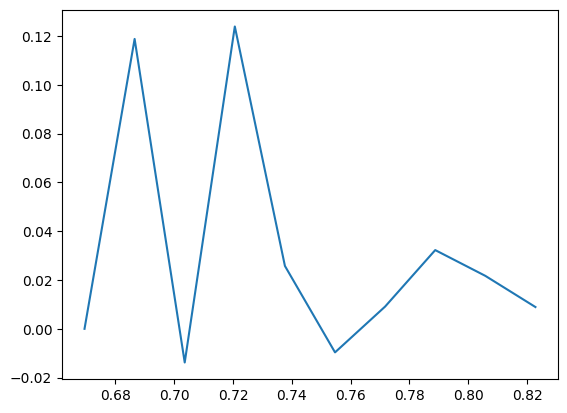

In [176]:
rs4 = res_4.mean.copy()
rd4 = res_denom_4.mean.copy()

S4 = rs4[:, 0, sid]
nzm = rs4[:, 1, sid] != 0
S4[nzm] /= rs4[:, 1, sid][nzm]
S4 /= rd4[:, sid][:, None]

S4 = np.mean(S4, axis=0)

plt.plot(r_bins_first_shell, S4)